# CAPAG

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
# importacao CAPAG dez/2020
c2020 = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAG-Municipios-Dez2020.csv', sep = ';')
c2020 = c2020[['Cod.IBGE', 'UF', 'Classificação da CAPAG']]
c2020 = c2020[c2020['Classificação da CAPAG'] != 'n.d.']
c2020 = c2020.rename(columns = ({'Cod.IBGE' : 'cod',
                                'Classificação da CAPAG' : 'capag'}))
c2020['data'] = '01-12-2020'

In [4]:
# importacao CAPAG abr/2021
c2021 = pd.read_excel('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAGMunicipios-Abr2021.xlsx', engine = 'openpyxl' )
c2021 = c2021[['Cod.IBGE', 'CAPAG_Oficial']]
c2021 = c2021[c2021['CAPAG_Oficial'] != 'n.d.']

c2021 = c2021.rename(columns = ({'Cod.IBGE' : 'cod',
                                'CAPAG_Oficial' : 'capag'}))

c2021['data'] = '01-04-2021'

In [5]:
# merge nos dois dataframes
capag = c2020.merge(c2021, how = 'inner', on = 'cod')

# renomeando as colunas
cols = ['cod_ibge', 'uf', 'capag_2020', 'data_2020', 'capag_2021', 'data_2021']
capag.columns = cols

In [6]:
# resultado final
capag.head()

,cod_ibge,uf,capag_2020,data_2020,capag_2021,data_2021
0,5200050,GO,B,01-12-2020,A,01-04-2021
1,3100104,MG,B,01-12-2020,A,01-04-2021
2,5200100,GO,C,01-12-2020,C,01-04-2021
3,3100203,MG,B,01-12-2020,A,01-04-2021
4,1500107,PA,C,01-12-2020,C,01-04-2021


In [7]:
capag.shape

(3668, 6)

In [8]:
3668 / 5570

0.6585278276481149

# DATA ANALYSIS

In [9]:
pd.DataFrame(capag['capag_2020'].value_counts(normalize = True) * 100)

,capag_2020
C,61.177754
B,20.910578
A,17.611778
D,0.299891


In [10]:
pd.DataFrame(capag['capag_2021'].value_counts(normalize = True) * 100)

,capag_2021
C,50.490731
A,28.353326
B,20.992366
D,0.163577


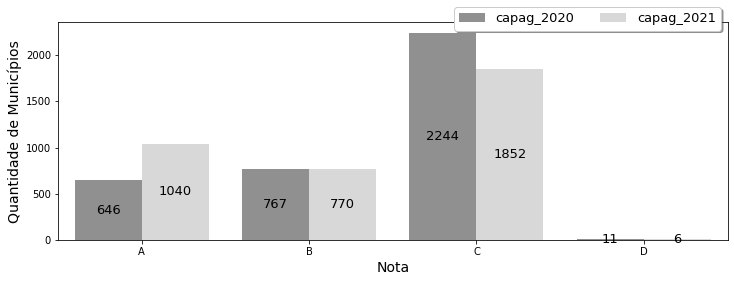

In [11]:
def plotar_grafico():
    palette = sns.set_palette(['#909090', '#D8D8D8'])
    
    aux = capag[['cod_ibge', 'capag_2020', 'capag_2021']]
    aux = pd.melt(aux, id_vars = 'cod_ibge')
    aux = aux.groupby(['variable', 'value'], as_index = False).count()
    
    plt.figure(figsize = (12, 4))
    ax = sns.barplot(data = aux, x = 'value', y = 'cod_ibge',hue = 'variable',  palette = palette);
    plt.bar_label(ax.containers[0], label_type='center', color = 'black', fontsize = 13,  fmt='%.0f');
    plt.bar_label(ax.containers[1], label_type='center', color = 'black', fontsize = 13,  fmt='%.0f');
    ax.legend(loc = 'upper right', bbox_to_anchor =(1, 1.10), ncol = 3, fancybox = True, shadow = True, 
                  fontsize = 13);
    plt.ylabel('Quantidade de Municípios', fontsize = 14);
    plt.xlabel('Nota', fontsize = 14);

plotar_grafico()

# CAPAG x SICONFI

In [12]:
siconfi = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',', thousands = '.')

/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
# importacao CAPAG abr/2021
capag = pd.read_excel('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAGMunicipios-Abr2021.xlsx', engine = 'openpyxl' )
capag = capag[['Cod.IBGE', 'CAPAG_Oficial', 'População']]
capag = capag[capag['CAPAG_Oficial'] != 'n.d.']

capag = capag.rename(columns = ({'CAPAG_Oficial' : 'capag'}))



In [14]:
siconfi = siconfi[siconfi['Coluna'] == 'Despesas Pagas']
siconfi = siconfi[siconfi['Conta'] == '12 - Educação']
siconfi = siconfi[['Cod.IBGE', 'Valor']]

siconfi = siconfi.rename(columns = ({'Valor' : 'siconfi'}))

In [15]:
df = capag.merge(siconfi, how = 'inner', on ='Cod.IBGE')
df.head()

,Cod.IBGE,capag,População,siconfi
0,5200050,A,8773.0,1.415498e+07
1,3100104,A,6989.0,5.365913e+06
2,5200100,C,20042.0,9.279337e+06
3,3100203,A,23237.0,1.092761e+07
4,1500107,C,156292.0,1.120977e+08


In [16]:
df['invest_medio'] = df[['População', 'siconfi']].apply(lambda x: round(x['siconfi'] / x['População'], 0), axis = 1)



# SAEB

In [17]:
saeb = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SAEB/microdados_saeb_2015/PLANILHAS DE RESULTADOS/saeb.csv',
                  sep = ';')


In [18]:
saeb['saeb'] = saeb[['LP', 'MT']].apply(lambda x: round((x['LP'] + x['MT']) / 2, 0), axis = 1)
saeb = saeb.rename(columns = ({'CO_MUNICIPIO' : 'Cod.IBGE'}))

In [19]:
df = df.merge(saeb[['Cod.IBGE', 'saeb']], how = 'inner', on = 'Cod.IBGE')

In [20]:
capag_dict = {'A' : 1,
             'B' : 2,
             'C' : 3,
             'D' : 4}

df['capag'] = df['capag'].map(capag_dict)

In [21]:
capag_dict = {1:'A',
             2:'B',
             3:'C' ,
             4:'D' }

df['capag'] = df['capag'].map(capag_dict)

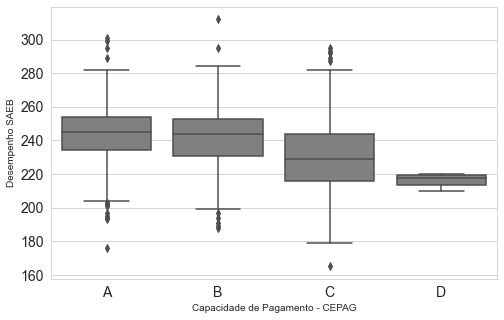

In [22]:
plt.figure(figsize = (8, 5))

sns.set_style("whitegrid")
order = ['A', 'B', 'C', 'D']
sns.boxplot(data = df, x = 'capag', y = 'saeb', color = 'grey', order = order);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.ylabel('Desempenho SAEB');
plt.xlabel('Capacidade de Pagamento - CEPAG');

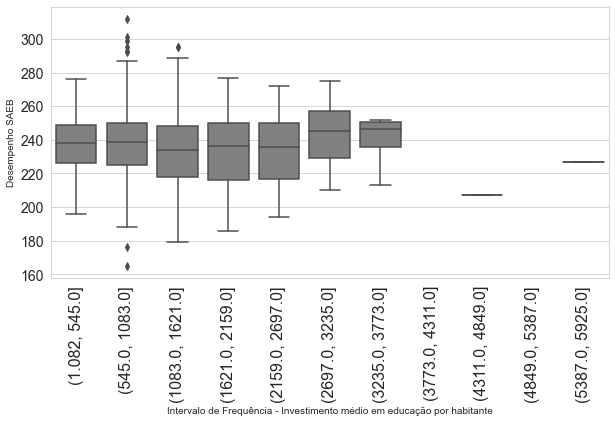

In [23]:
#tabela de frequência
tamanho = len(df['invest_medio']) /3
k = int((1 + ((10/3) * np.log10(tamanho))))
df['classe_invest_medio'] = pd.cut( x = df['invest_medio'], bins = k, include_lowest= False)

df = df.sort_values(by='classe_invest_medio')

plt.figure(figsize = (10, 5))

sns.set_style("whitegrid")
sns.boxplot(data = df, x = 'classe_invest_medio', y = 'saeb', color = 'grey');
plt.xticks(rotation = 90, fontsize = 16);
plt.xlabel('Intervalo de Frequência - Investimento médio em educação por habitante')
plt.ylabel('Desempenho SAEB')
plt.yticks(fontsize = 14);


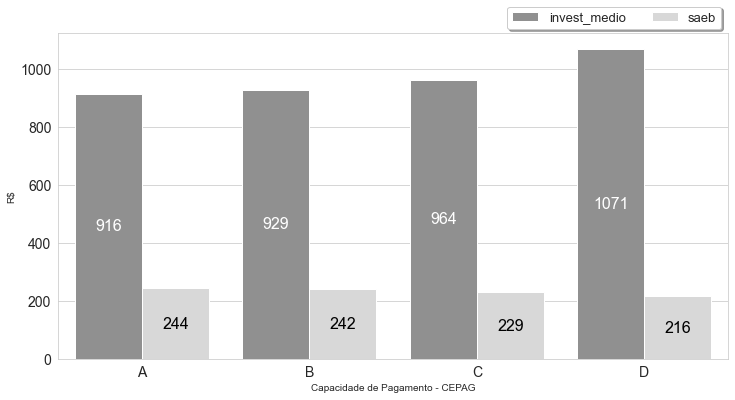

In [24]:
df2 = df[['capag', 'invest_medio', 'saeb']]
plt.figure(figsize=(12, 6));
palette = sns.set_palette(['#909090', '#D8D8D8'])

order = ['A', 'B', 'C', 'D']
ax = sns.barplot(data = df2.melt(id_vars = 'capag'), x = 'capag', y = 'value',hue = 'variable',
           ci = False, order = order, palette = palette);

plt.bar_label(ax.containers[0], label_type='center', color = 'white', fontsize = 16,  fmt='%.0f');
plt.bar_label(ax.containers[1], label_type='center', color = 'black', fontsize = 16,  fmt='%.0f');
ax.legend(loc = 'upper right', bbox_to_anchor =(1, 1.10), ncol = 3, fancybox = True, shadow = True, 
                  fontsize = 13);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.ylabel('R$');
plt.xlabel('Capacidade de Pagamento - CEPAG');


# SAEB

In [25]:
ss = pd.read_excel('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SAEB/microdados_saeb_2019/PLANILHAS DE RESULTADOS/TS_MUNICIPIO.xlsx',
                    engine = 'openpyxl')


In [26]:
ss = ss[['CO_MUNICIPIO','MEDIA_5_LP', 'MEDIA_5_MT','MEDIA_9_LP', 'MEDIA_9_MT']]

ss['LP'] = round((ss['MEDIA_5_LP'] + ss['MEDIA_9_LP']) / 2, 0)
ss['MT'] = round((ss['MEDIA_5_MT'] + ss['MEDIA_9_MT']) / 2, 0)

ss = ss[['CO_MUNICIPIO', 'LP', 'MT']]

ss = ss.groupby('CO_MUNICIPIO', as_index = False).mean()

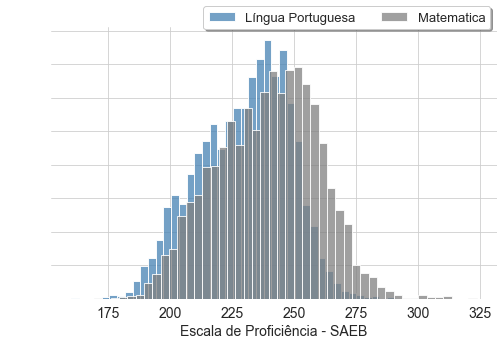

In [27]:
palette = sns.set_palette(['#4682B4','#D8D8D8'])

plt.figure(figsize = (8, 5))
ax = sns.histplot(data = ss, x = 'LP', label = 'Língua Portuguesa');
sns.histplot(data = ss, x = 'MT', color = 'grey', label = 'Matematica', palette = palette);

plt.legend()
sns.despine(bottom = True, left = True);
plt.xlabel('Escala de Proficiência - SAEB', fontsize = 14);
ax.legend(loc = 'upper right', bbox_to_anchor =(1, 1.10), ncol = 3, fancybox = True, shadow = True, 
                  fontsize = 13);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14, color = 'white');
plt.ylabel([], color = 'white');


# SICONFI

In [28]:
siconfi = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',', thousands = '.')

/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
# def plotar_grafico():
#     sns.set_style("whitegrid")
#     #palette = sns.set_palette(['#D8D8D8'])
    
#     plt.figure(figsize = (12, 3))
#     aux = pd.DataFrame(siconfi[['2020', '2019', '2018', '2017']].sum()).reset_index().rename(columns={0 : 'total'}).sort_values(by='index')
#     aux['total'] = aux['total'] / 1000000
    
#     plt.figure(figsize = (15, 5));
#     ax = sns.lineplot(data = aux, x = 'index', y = 'total', color = 'dimgrey', linewidth = 1.5, marker = 'o');
#     plt.ylabel('R$ - Em milhões',  fontsize = 13);
#     plt.xlabel('Ano', fontsize = 13);
#     plt.xticks( fontsize = 13)
#     plt.yticks( fontsize = 13)
#     plt.grid(False)



# plotar_grafico()



In [30]:
siconfi = siconfi[siconfi['Coluna'] == 'Despesas Pagas']
siconfi = siconfi[siconfi['Conta'] == '12 - Educação']
siconfi = siconfi[['Cod.IBGE', 'Valor']]

siconfi = siconfi.rename(columns = ({'Valor' : 'siconfi'}))

# MERGE DATAFRAME

In [31]:
cols = ['cod', 'capag','pop']
capag.columns = cols

siconfi = siconfi[['Cod.IBGE', 'siconfi']]
cols = ['cod', 'siconfi']
siconfi.columns = cols

ss['saeb'] = round((ss['LP'] + ss['MT']) / 2, 2)
ss = ss[['CO_MUNICIPIO', 'saeb']]

cols = ['cod', 'saeb']
ss.columns = cols

df = capag.merge(ss, how = 'inner', on = 'cod')
df = df.merge(siconfi, on = 'cod', how = 'inner')

In [32]:
df = capag.merge(ss, how = 'inner', on = 'cod')
df = df.merge(siconfi, on = 'cod', how = 'inner')

df.head()

,cod,capag,pop,saeb,siconfi
0,5200050,A,8773.0,236.31,1.415498e+07
1,3100104,A,6989.0,264.25,5.365913e+06
2,5200100,C,20042.0,226.50,9.279337e+06
3,3100203,A,23237.0,261.20,1.092761e+07
4,1500107,C,156292.0,203.17,1.120977e+08


In [33]:
saeb_mean = df['saeb'].mean()
df['saeb'] = df['saeb'].fillna(saeb_mean)

In [34]:
capag_dict = {'A' : 1,
             'B' : 2,
             'C' : 3,
             'D' : 4}

df['capag'] = df['capag'].map(capag_dict)

In [35]:
df.head()

,cod,capag,pop,saeb,siconfi
0,5200050,1,8773.0,236.31,1.415498e+07
1,3100104,1,6989.0,264.25,5.365913e+06
2,5200100,3,20042.0,226.50,9.279337e+06
3,3100203,1,23237.0,261.20,1.092761e+07
4,1500107,3,156292.0,203.17,1.120977e+08


<AxesSubplot:xlabel='pop', ylabel='saeb'>

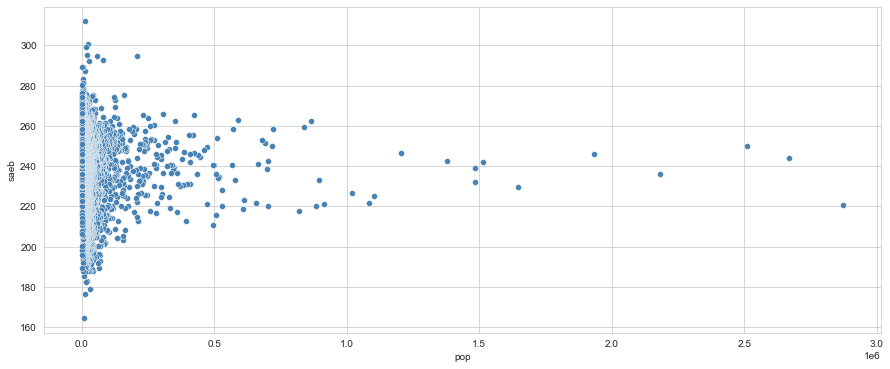

In [36]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data = df.sort_values(by='pop', ascending = False)[2:], 
                x = 'pop', y = 'saeb')

<AxesSubplot:xlabel='pop', ylabel='siconfi'>

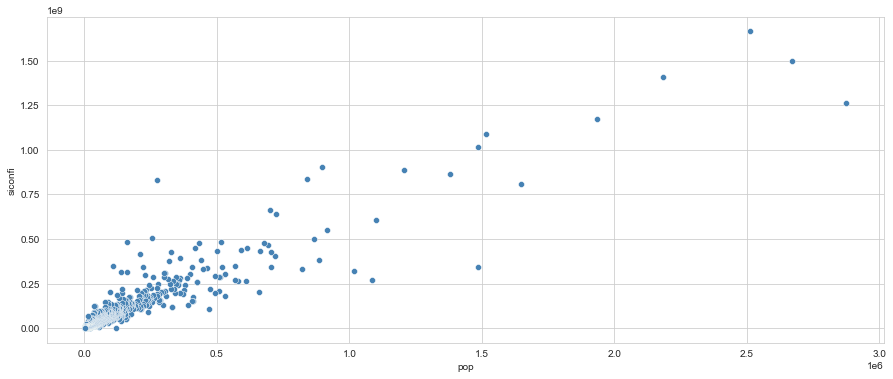

In [37]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data = df.sort_values(by='pop', ascending = False)[2:], 
                x = 'pop', y = 'siconfi')

<AxesSubplot:xlabel='saeb', ylabel='siconfi'>

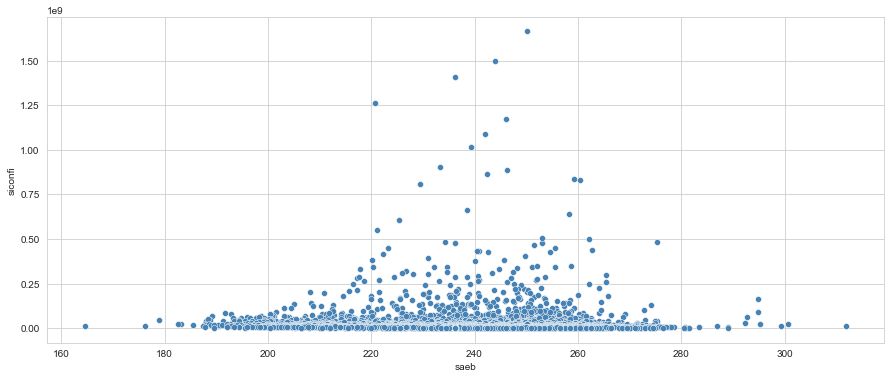

In [38]:
plt.figure(figsize = (15, 6))
sns.scatterplot(data = df.sort_values(by='pop', ascending = False)[2:], 
                x = 'saeb', y = 'siconfi')

In [39]:
df.head(10)

,cod,capag,pop,saeb,siconfi
0,5200050,1,8773.0,236.31,1.415498e+07
1,3100104,1,6989.0,264.25,5.365913e+06
2,5200100,3,20042.0,226.50,9.279337e+06
3,3100203,1,23237.0,261.20,1.092761e+07
4,1500107,3,156292.0,203.17,1.120977e+08
5,4100103,3,7457.0,242.00,5.184372e+06
6,4200101,1,17904.0,233.50,1.853766e+07
7,3100302,2,13465.0,255.19,6.479325e+06
8,2600054,2,99990.0,220.75,3.972115e+07
9,1700251,3,2579.0,224.00,3.890043e+06


# NOME MUNICÍPIO

In [40]:
mun_nome = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/CAPAG/CAPAGMunicipios-Abr2021 - capag.csv',
                  sep = ',')
mun_nome

,Município,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,Classificação_CAPAG,Indicador_1_Revisão,Nota_1_Revisão,Indicador_2_Revisão,Nota_2_Revisão,Indicador_3_Revisão,Nota_3_Revisão,CAPAG_Revisão,CAPAG_Oficial
0,Abadia de Goiás - GO,5200050,GO,8773.0,"0,08136333952",A,"0,8925147231",A,"0,5414703005",A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
1,Abadia dos Dourados - MG,3100104,MG,6989.0,"0,1272324734",A,"0,8836729333",A,"0,1616611162",A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,Abadiânia - GO,5200100,GO,20042.0,"0,1885726696",A,"0,9466140559",B,"2,226205681",C,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
3,Abaeté - MG,3100203,MG,23237.0,"0,2562741189",A,"0,828040757",A,"0,1769593174",A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
4,Abaetetuba - PA,1500107,PA,156292.0,"0,03198608574",A,"0,9611953318",C,"0,8821596457",A,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,Xique Xique - BA,2933604,BA,46483.0,"0,4301684006",A,"0,990211312",C,"0,4941936329",A,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
5565,Zabelê - PB,2517407,PB,2240.0,"0,008101754085",A,"1,000337814",C,"0,01150917292",A,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
5566,Zacarias - SP,3557154,SP,2718.0,0,A,"0,8480750044",A,"0,001591069585",A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
5567,Zé Doca - MA,2114007,MA,51714.0,"0,1733912759",A,"0,8533879506",A,"-2,709549317",C,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C


In [41]:
mun_nome = mun_nome.iloc[:, :2]
mun_nome = mun_nome[['Cod.IBGE', 'Município']]

In [42]:
mun_nome['uf'] = mun_nome['Município'].str.split('-').str[1]

In [43]:
for i, j in zip(mun_nome['uf'], mun_nome.index):
    t = len(i)
    if t > 3:
        print(j, mun_nome.iloc[j]['Município'])
        

cols = ['cod', 'municipio', 'uf']
mun_nome.columns = cols

In [44]:
df = df.merge(mun_nome, on = 'cod', how = 'inner')
df = df[['cod', 'municipio', 'uf', 'capag', 'pop', 'saeb', 'siconfi']]

df.head()

,cod,municipio,uf,capag,pop,saeb,siconfi
0,5200050,Abadia de Goiás - GO,GO,1,8773.0,236.31,1.415498e+07
1,3100104,Abadia dos Dourados - MG,MG,1,6989.0,264.25,5.365913e+06
2,5200100,Abadiânia - GO,GO,3,20042.0,226.50,9.279337e+06
3,3100203,Abaeté - MG,MG,1,23237.0,261.20,1.092761e+07
4,1500107,Abaetetuba - PA,PA,3,156292.0,203.17,1.120977e+08


In [45]:
df['siconfi_medio'] = df[['pop', 'siconfi']].apply(lambda x: round(x['siconfi'] / x['pop'], 0), axis = 1)

df.head()

,cod,municipio,uf,capag,pop,saeb,siconfi,siconfi_medio
0,5200050,Abadia de Goiás - GO,GO,1,8773.0,236.31,1.415498e+07,1613.0
1,3100104,Abadia dos Dourados - MG,MG,1,6989.0,264.25,5.365913e+06,768.0
2,5200100,Abadiânia - GO,GO,3,20042.0,226.50,9.279337e+06,463.0
3,3100203,Abaeté - MG,MG,1,23237.0,261.20,1.092761e+07,470.0
4,1500107,Abaetetuba - PA,PA,3,156292.0,203.17,1.120977e+08,717.0


In [46]:
df.shape

(4362, 8)

## CAPAG ALTO

In [47]:
# Somente capacidade de pagamento A e B (1 e 2)
pot_mun = df[(df['capag'] == 1) | (df['capag'] == 2)]
pot_mun.head()

,cod,municipio,uf,capag,pop,saeb,siconfi,siconfi_medio
0,5200050,Abadia de Goiás - GO,GO,1,8773.0,236.31,14154979.45,1613.0
1,3100104,Abadia dos Dourados - MG,MG,1,6989.0,264.25,5365912.81,768.0
3,3100203,Abaeté - MG,MG,1,23237.0,261.20,10927614.06,470.0
6,4200101,Abelardo Luz - SC,SC,1,17904.0,233.50,18537661.15,1035.0
7,3100302,Abre Campo - MG,MG,2,13465.0,255.19,6479325.19,481.0


In [48]:
pot_mun.shape

(2180, 8)

In [49]:
pot_mun['siconfi_medio'].min()

7.0

In [50]:
pot_mun['siconfi_medio'].max()

5925.0

<AxesSubplot:>

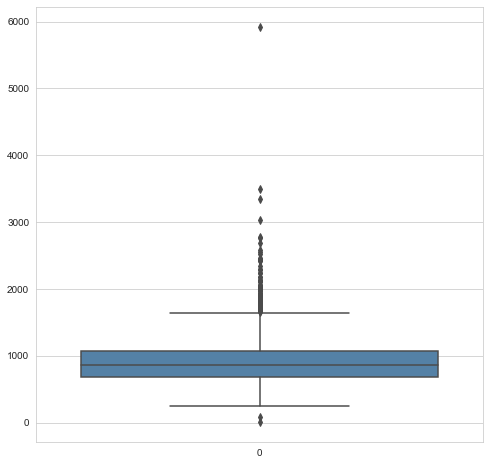

In [51]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = pot_mun['siconfi_medio'])

In [161]:
df.head(10)

,cod,municipio,uf,capag,pop,saeb,siconfi,siconfi_medio
0,5200050,Abadia de Goiás - GO,GO,1,8773.0,236.31,1.415498e+07,1613.0
1,3100104,Abadia dos Dourados - MG,MG,1,6989.0,264.25,5.365913e+06,768.0
2,5200100,Abadiânia - GO,GO,3,20042.0,226.50,9.279337e+06,463.0
3,3100203,Abaeté - MG,MG,1,23237.0,261.20,1.092761e+07,470.0
4,1500107,Abaetetuba - PA,PA,3,156292.0,203.17,1.120977e+08,717.0
5,4100103,Abatiá - PR,PR,3,7457.0,242.00,5.184372e+06,695.0
6,4200101,Abelardo Luz - SC,SC,1,17904.0,233.50,1.853766e+07,1035.0
7,3100302,Abre Campo - MG,MG,2,13465.0,255.19,6.479325e+06,481.0
8,2600054,Abreu e Lima - PE,PE,2,99990.0,220.75,3.972115e+07,397.0
9,1700251,Abreulândia - TO,TO,3,2579.0,224.00,3.890043e+06,1508.0


In [52]:
def remove_outlier():
    q1 = pot_mun['siconfi_medio'].quantile(0.25)
    q3 = pot_mun['siconfi_medio'].quantile(0.75)
    iqr = q3-q1 #interquartil
    f_low  = q1-1.5*iqr
    f_high = q3+1.5*iqr
    df_out = pot_mun.loc[(pot_mun['siconfi_medio'] > f_low) & (pot_mun['siconfi_medio'] < f_high)]
    return df_out

In [53]:
pot_mun = pot_mun[pot_mun['siconfi_medio'] < 2697]

In [162]:
df.shape

(4362, 8)

In [55]:
remove_outlier().shape

(2103, 8)

In [163]:
(4362 - 2103) / 4362

0.5178817056396149

In [56]:
remove_outlier()['saeb'].mean()

242.69555333008014

In [57]:
remove_outlier()[remove_outlier()['saeb'] < remove_outlier()['saeb'].mean()]

,cod,municipio,uf,capag,pop,saeb,siconfi,siconfi_medio
0,5200050,Abadia de Goiás - GO,GO,1,8773.0,236.310000,1.415498e+07,1613.0
6,4200101,Abelardo Luz - SC,SC,1,17904.0,233.500000,1.853766e+07,1035.0
8,2600054,Abreu e Lima - PE,PE,2,99990.0,220.750000,3.972115e+07,397.0
20,4100202,Adrianópolis - PR,PR,1,5983.0,221.750000,5.923917e+06,990.0
31,5100201,Água Boa - MT,MT,1,25721.0,235.750000,2.327587e+07,905.0
...,...,...,...,...,...,...,...,...
4329,3205309,Vitória - ES,ES,1,362097.0,231.000000,3.919977e+08,1083.0
4331,2933307,Vitória da Conquista - BA,BA,2,338480.0,236.790000,2.220575e+08,656.0
4332,4323754,Vitória das Missões - RS,RS,1,3133.0,236.162763,3.154293e+06,1007.0
4337,3172103,Volta Grande - MG,MG,2,5252.0,231.500000,4.772811e+06,909.0


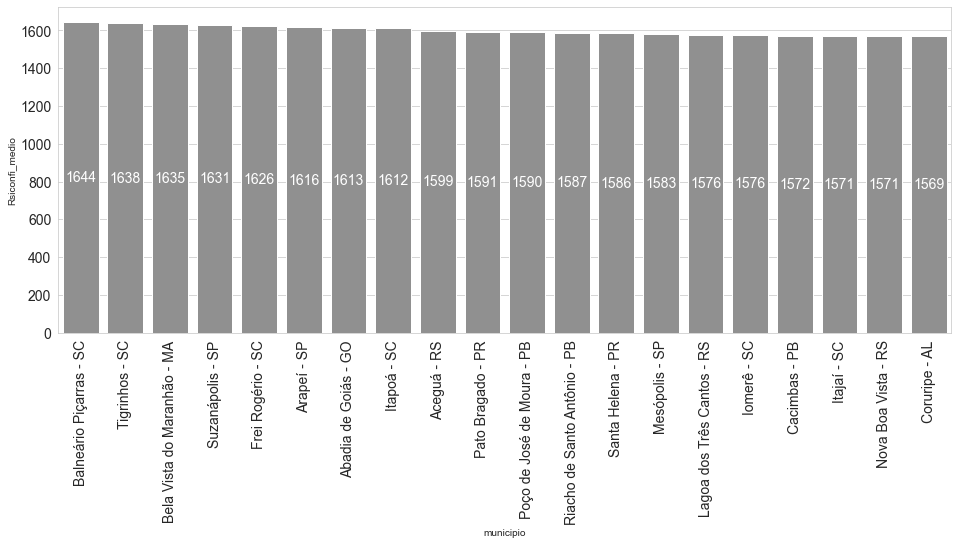

In [177]:
plt.figure(figsize=(16, 6));
palette = sns.set_palette(['#909090', '#D8D8D8'])

order = remove_outlier().groupby('municipio')['siconfi_medio'].mean().sort_values(ascending = False)[:20].index
aux = remove_outlier().groupby('municipio', as_index = False)['siconfi_medio'].mean().sort_values(by ='siconfi_medio', ascending = False)[:20]
ax = sns.barplot(data = pd.DataFrame(aux), x = 'municipio', y = 'siconfi_medio',
           ci = False,  color = '#909090', order = order);

plt.bar_label(ax.containers[0], label_type='center', color = 'white', fontsize = 14,  fmt='%.0f');
plt.xticks(fontsize = 14, rotation = 90);
plt.yticks(fontsize = 14);
plt.ylabel('Rsiconfi_medio')
plt.xlabel('municipio');


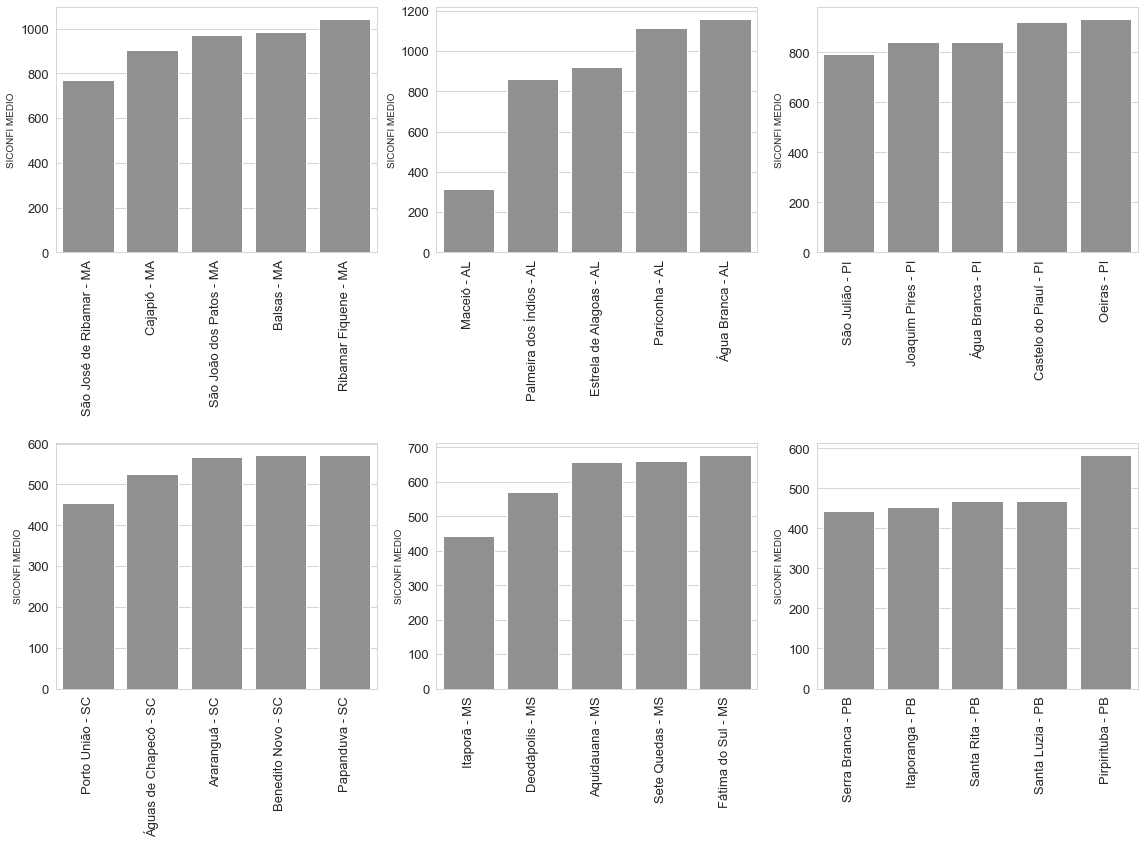

In [157]:
def test():
    
    aux = remove_outlier().groupby('uf')['siconfi_medio'].mean().sort_values(ascending = False)[:6].index
    plt.figure(figsize=(16, 12));
    x = 1
    
    for i in aux:
        aux3 = remove_outlier()[remove_outlier()['uf'] == i].sort_values(by='siconfi_medio')[:5]
        plt.subplot(2, 3, x)
        palette = sns.set_palette(['#909090', '#909090', '#909090', '#909090', '#909090'])
        
        ax = sns.barplot(data = aux3, x = 'municipio', y = 'siconfi_medio', ci = False, palette = palette);

        plt.xticks(fontsize = 13, rotation = 90);
        plt.yticks(fontsize = 13);
        plt.ylabel('SICONFI MEDIO');
        plt.xlabel(' ');
        plt.tight_layout()
    
        x += 1


test()

In [138]:
aux = remove_outlier().groupby('uf')['siconfi_medio'].mean().sort_values(ascending = False)[:5].index
aux3 = remove_outlier()[remove_outlier()['uf'] == i].sort_values(by='siconfi_medio')[:5]

aux3

,cod,municipio,uf,capag,pop,saeb,siconfi,siconfi_medio
1861,5004502,Itaporã - MS,MS,1,24839.0,234.88,10969844.01,442.0
1170,5003454,Deodápolis - MS,MS,1,12924.0,235.88,7364210.07,570.0
213,5001102,Aquidauana - MS,MS,2,47871.0,214.64,31433125.10,657.0
3926,5007703,Sete Quedas - MS,MS,1,10791.0,229.20,7123280.12,660.0
1339,5003801,Fátima do Sul - MS,MS,2,19234.0,238.68,13040718.46,678.0


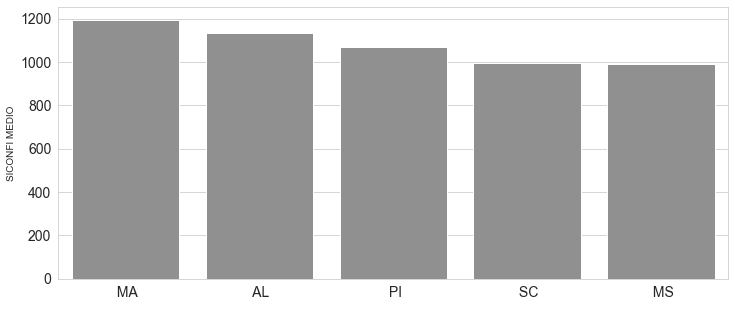

In [131]:
aux = remove_outlier().groupby('uf')['siconfi_medio'].mean().sort_values(ascending = False)[:5].index
aux1 = remove_outlier().query('uf in @aux')

plt.figure(figsize=(12, 5));
palette = sns.set_palette(['#909090', '#909090', '#909090', '#909090', '#909090'])

order = aux1.groupby('uf').mean().sort_values(by='siconfi_medio', ascending = False)['siconfi_medio'].index
ax = sns.barplot(data = aux1, x = 'uf', y = 'siconfi_medio',
            ci = False, palette = palette, order = order);

plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.ylabel('SICONFI MEDIO');
plt.xlabel(' ');